In [1]:
from google.colab import drive
import os, sys

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 드라이브 접근
%cd /content/drive/MyDrive/

# 미션 수행을 위한 폴더 생성
!mkdir -p Mission2

Mounted at /content/drive
/content/drive/MyDrive


# Mission 2. 패션 스타일 선호 여부 예측

## Mission 2-1

**1. “{W/T}_{이미지ID}_{시대별}_{스타일별}_{성별}_{설문ID}.json” 형식으로 저장된 데이터셋을 분류하여 정리한다.**  
**2. 분류는 성별&스타일 별 데이터의 개수로 한다.**  
**3. 주어진 데이터에서 이미지ID를 식별하여 유효한 라벨링 데이터만을 대상으로 한다.**  
**4. Train과 Validation에 대하여 각각 통계치를 작성한다.**

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

### 1. 라벨 데이터 처리

#### 1. 이미지 데이터 DataFrame 변환

In [3]:
from IPython.display import display_html

t_img_path = "dataset/origin_dataset/training_image"
v_img_path = "dataset/origin_dataset/validation_image"

# 파일 리스트
t_image_list = os.listdir(t_img_path)
v_image_list = os.listdir(v_img_path)

# train과 validation 데이터셋의 이미지 수를 확인
print(f"train image: {len(t_image_list)}, validation image: {len(v_image_list)}")

# 파일리스트 -> 메타데이터 Pandas 객체
def img2data(image_list):
    data = []

    for i in range(len(image_list)):
        meta_data = image_list[i].split('_')

        row = {
            'file_name': image_list[i][:-4],    # ".jpg"를 제외한 전체 파일명
            'wt': meta_data[0],
            'image_id': meta_data[1],
            'time': meta_data[2],
            'style': meta_data[3],
            'gender': meta_data[4][0]
        }
        data.append(row)
    return pd.DataFrame(data)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 변환 적용
t_img_df = img2data(t_image_list)
v_img_df = img2data(v_image_list)

# 결과 확인
display_left(t_img_df.head(), v_img_df.head())

train image: 4070, validation image: 951


,file_name,wt,image_id,time,style,gender
0,W_13846_60_minimal_W,W,13846,60,minimal,W
1,W_15811_10_sportivecasual_M,W,15811,10,sportivecasual,M
2,W_14489_19_normcore_W,W,14489,19,normcore,W
3,W_12533_80_bold_M,W,12533,80,bold,M
4,W_16836_19_normcore_M,W,16836,19,normcore,M
,file_name,wt,image_id,time,style,gender
0,W_11610_90_grunge_W,W,11610,90,grunge,W
1,W_38588_19_genderless_W,W,38588,19,genderless,W
2,W_47169_70_hippie_W,W,47169,70,hippie,W
3,W_02498_50_feminine_W,W,02498,50,feminine,W


#### 2. Label 데이터 DataFrame 변환

**1. Label 수가 너무 많고 Mount 된 Google Drive의 I/O성능이 좋지 않아 Timeout 에러가 생깁니다.**  
**2. 미리 로컬에서 training_label, validation_label 폴더를 /context 폴더 (colab자원) 으로 복사한뒤 처리해서 처리 가능하게 했습니다.**


In [4]:
# dataset/
!mkdir -p /content/dataset
!cp -r /content/drive/MyDrive/dataset/origin_dataset/all_label.zip /content/dataset
!unzip -o -qq /content/dataset/all_label.zip -d /content/dataset/

In [5]:
from IPython.display import display_html

# t_label_path = "dataset/origin_dataset/training_label"
# v_label_path = "dataset/origin_dataset/validation_label"

# Google Drive에서 os.listdir하면 timeout이 걸리므로 /content 에서 처리
t_label_path = "/content/dataset/training_label"
v_label_path = "/content/dataset/validation_label"

# 파일 리스트
t_label_list = os.listdir(t_label_path)
v_label_list = os.listdir(v_label_path)

# train과 validation 데이터셋의 label 수를 확인
print(f"train label: {len(t_label_list)}, validation label: {len(v_label_list)}")

# 파일리스트 -> 메타데이터 Pandas 객체
def label2data(label_list):
    data = []

    for i in range(len(label_list)):
        meta_data = label_list[i].split('_')

        if len(meta_data) < 2:
            print(meta_data)
        row = {
            'file_name': label_list[i][:-5],    # ".json"을 제외한 전체 파일명
            'wt': meta_data[0],
            'image_id': meta_data[1],
            'time': meta_data[2],
            'style': meta_data[3],
            'gender': meta_data[4],
            'survey_id': meta_data[5].split('.')[0],
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
t_lbl_df = label2data(t_label_list)
v_lbl_df = label2data(v_label_list)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 결과 확인
display_left(t_lbl_df.head(), v_lbl_df.head())

train label: 211346, validation label: 36383


,file_name,wt,image_id,time,style,gender,survey_id
0,T_16328_80_bold_M_052745,T,16328,80,bold,M,052745
1,W_54911_90_hiphop_M_055386,W,54911,90,hiphop,M,055386
2,W_09963_80_powersuit_W_063380,W,09963,80,powersuit,W,063380
3,T_19440_19_normcore_M_053820,T,19440,19,normcore,M,053820
4,W_25290_90_hiphop_M_233064,W,25290,90,hiphop,M,233064
,file_name,wt,image_id,time,style,gender,survey_id
0,T_07744_10_sportivecasual_M_249305,T,07744,10,sportivecasual,M,249305
1,W_29427_90_hiphop_M_150389,W,29427,90,hiphop,M,150389
2,W_65038_10_athleisure_W_138167,W,65038,10,athleisure,W,138167
3,W_06148_50_ivy_M_060381,W,06148,50,ivy,M,060381


#### 3. 이미지 데이터에도 존재하는 Label데이터 필터링

> `이미지ID`만을 기준으로 filtering 할 경우 실제 속성값은 전혀 다른 이미지 데이터도 포함됨을 확인

In [6]:
# 이미지ID가 "00004"인 라벨 정보 확인
# 동일한 이미지ID를 가진 두 이미지 확인("T_00004_90_hiphop_M"/"W_00004_50_ivy_M")
# 여기서 말하는 imageID는 wt+image_id를 말함 (미션1-1에서 ID는 같을 수 있음을 확인했기 때문)
t_lbl_df[t_lbl_df['image_id'] == '00004']

,file_name,wt,image_id,time,style,gender,survey_id
21238,W_00004_50_ivy_M_153260,W,00004,50,ivy,M,153260
44261,W_00004_50_ivy_M_067526,W,00004,50,ivy,M,067526
85488,T_00004_90_hiphop_M_203010,T,00004,90,hiphop,M,203010
88028,T_00004_90_hiphop_M_206164,T,00004,90,hiphop,M,206164
88201,W_00004_50_ivy_M_185102,W,00004,50,ivy,M,185102
131236,W_00004_50_ivy_M_134675,W,00004,50,ivy,M,134675
134892,W_00004_50_ivy_M_179491,W,00004,50,ivy,M,179491
169817,T_00004_90_hiphop_M_071538,T,00004,90,hiphop,M,071538
170260,W_00004_50_ivy_M_060212,W,00004,50,ivy,M,060212
197689,W_00004_50_ivy_M_092597,W,00004,50,ivy,M,092597


> `이미지 파일명`을 기준으로 유효한 labeling data filtering

In [7]:
# 유효한 라벨링 데이터 filtering
def filtering_labels(img_df, lbl_df):
    lbl_df['survey_imgname'] = lbl_df['file_name'].apply(lambda x: x[:-7]) # 설문ID를 제외한 이미지 파일명
    img_filenames = img_df['file_name'] # 이미지 데이터 파일명
    filtered_lbls = lbl_df[lbl_df['survey_imgname'].isin(img_filenames)].reset_index(drop=True)    # 이미지 데이터 파일명에 해당하는 라벨링 데이터만 추출

    return filtered_lbls.drop(columns=['survey_imgname'])

filtered_t_lbl = filtering_labels(t_img_df, t_lbl_df)
filtered_v_lbl = filtering_labels(v_img_df, v_lbl_df)

# filtering된 결과 확인
print(f"filtered train label: {len(filtered_t_lbl)}, filtered validation label: {len(filtered_v_lbl)}")
display_left(filtered_t_lbl.head(), filtered_v_lbl.head())

filtered train label: 16096, filtered validation label: 4105


,file_name,wt,image_id,time,style,gender,survey_id
0,W_27004_90_hiphop_M_144969,W,27004,90,hiphop,M,144969
1,W_06148_50_ivy_M_060381,W,06148,50,ivy,M,060381
2,W_05289_50_feminine_W_198286,W,05289,50,feminine,W,198286
3,W_06979_90_hiphop_M_080074,W,06979,90,hiphop,M,080074
4,W_09157_60_mods_M_137515,W,09157,60,mods,M,137515
,file_name,wt,image_id,time,style,gender,survey_id
0,W_06148_50_ivy_M_060381,W,06148,50,ivy,M,060381
1,W_28373_80_powersuit_W_045372,W,28373,80,powersuit,W,045372
2,T_00253_60_popart_W_203632,T,00253,60,popart,W,203632
3,W_04638_00_metrosexual_M_069396,W,04638,00,metrosexual,M,069396


> filtering 된 labeling data만 복사하여 저장

In [9]:
import shutil
from tqdm.notebook import tqdm

# 유효한 라벨링 데이터 복사 함수
def filtering_label(df, dest_dir, state='train'):
    src_folder = '/content/dataset' # 원본 데이터셋 폴더 위치

    if state == 'train':
        folder = 'training_label'
    elif state == 'validation':
        folder = 'validation_label'

    # 경로 지정
    src_path = os.path.join(src_folder, folder)
    dest_path = os.path.join(dest_dir, folder)

    # 복사하여 저장할 경로의 폴더 생성
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # 오류 발생을 대비하여 처리된 이미지 수 추적
    processed_count = 0
    error_count = 0

    file_list = os.listdir(src_path)

    # 파일 복사
    for file in tqdm(df, desc=f"Processing {folder}", unit='file'):

        file += '.json'
        src_file_path = os.path.join(src_path, file)
        dest_file_path = os.path.join(dest_path, file)

        try:
            if file in file_list:
                shutil.copy2(src_file_path, dest_file_path)
                processed_count += 1
            else:
                continue
        except Exception as e:
            error_count += 1
            print(f"Error: {e}")

    print(f"\nFolder: {folder}")
    print(f"Processed files: {processed_count}")
    print(f"Errors encountered: {error_count}\n")


dest_dir = "/content/filtered_label" # 복사된 파일이 저장될 경로
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

t_filenames = filtered_t_lbl['file_name'].values
v_filenames = filtered_v_lbl['file_name'].values

filtering_label(t_filenames, dest_dir, state='train')
filtering_label(v_filenames, dest_dir, state='validation')

Processing training_label:   0%|          | 0/16096 [00:00<?, ?file/s]


Folder: training_label
Processed files: 16096
Errors encountered: 0



Processing validation_label:   0%|          | 0/4105 [00:00<?, ?file/s]


Folder: validation_label
Processed files: 4105
Errors encountered: 0



#### 4. 오류가 있는 파일 제거
**1. 공지에 있었던 동일 응답자가 1개의 아이템에 대항 선호와 비선호 둘을 모두 나타낸 파일 제거**  
**2. 3-1을 진행하며 발견했던 자료. 두번째에 해당하는 "W_27750_60_mods_M_146696.json"를 제거함.**

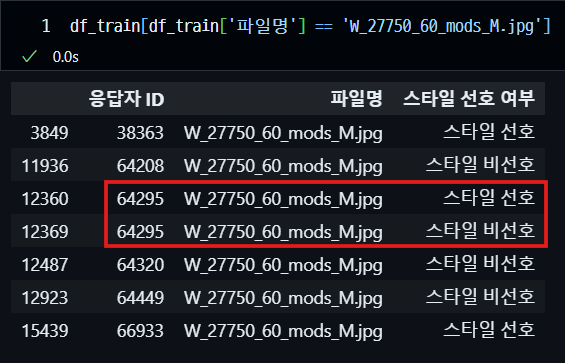

In [42]:
print(f"filtered_training_label: {len(os.listdir('/content/filtered_label/training_label'))}")
print(f"filtered_validation_label: {len(os.listdir('/content/filtered_label/validation_label'))}")

# W_27750_60_mods_M_146696.json 제거
!rm /content/filtered_label/training_label/W_27750_60_mods_M_146696.json
!rm /content/filtered_label/validation_label/W_27750_60_mods_M_146696.json

print(f"filtered_training_label: {len(os.listdir('/content/filtered_label/training_label'))}")
print(f"filtered_validation_label: {len(os.listdir('/content/filtered_label/validation_label'))}")

filtered_training_label: 16095
filtered_validation_label: 4105
rm: cannot remove '/content/filtered_label/training_label/W_27750_60_mods_M_146696.json': No such file or directory
filtered_training_label: 16095
filtered_validation_label: 4104


### 2. 유효한 데이터에 대한 스타일&성별 통계치 작성

In [43]:
import os
import pandas as pd
from IPython.display import display_html

# 파일 리스트 생성
training_label_list = os.listdir('/content/filtered_label/training_label')
validation_label_list = os.listdir('/content/filtered_label/validation_label')

# train과 validation 데이터셋의 label 수를 확인
print(f"train label: {len(training_label_list)}, validation label: {len(validation_label_list)}")

# 파일리스트 -> 메타데이터 Pandas 객체
def path2data(label_list):
    data = []

    for i in range(len(label_list)):
        meta_data = label_list[i].split('_')

        row = {
            'wt': meta_data[0],
            'image_id': meta_data[1],
            'time': meta_data[2],
            'style': meta_data[3],
            'gender': meta_data[4],
            'survey_id': meta_data[5].split('.')[0]
        }
        data.append(row)
    return pd.DataFrame(data)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)


# 변환 적용
training_df = path2data(training_label_list)
validation_df = path2data(validation_label_list)

# 결과 확인
display_left(training_df.head(), validation_df.head())

# 결과 저장
training_df.to_csv('Mission2/training_df.csv', index=False)
validation_df.to_csv('Mission2/validation_df.csv', index=False)

train label: 16095, validation label: 4104


,wt,image_id,time,style,gender,survey_id
0,W,27004,90,hiphop,M,144969
1,W,06148,50,ivy,M,060381
2,W,05289,50,feminine,W,198286
3,W,06979,90,hiphop,M,080074
4,W,09157,60,mods,M,137515
,wt,image_id,time,style,gender,survey_id
0,W,06148,50,ivy,M,060381
1,W,28373,80,powersuit,W,045372
2,T,00253,60,popart,W,203632
3,W,04638,00,metrosexual,M,069396


> groupby를 활용하여 통계치 작성

In [44]:
# 성별&스타일 통계치 작성 함수
def get_gender_style_stats(df, state='train'):
    # 메타 정보 가공
    group_data = df[['gender', 'style', 'survey_id']].groupby(['gender', 'style']).count()
    # 출력 데이터 column 이름 수정
    group_data.rename(columns={'survey_id': f'{state}_count'}, inplace=True)

    return group_data

# 함수 실행 후 변수에 저장
training_stats_data = get_gender_style_stats(training_df, state='train')
validation_stats_data = get_gender_style_stats(validation_df, state='validation')

# 결과 확인
display_left(training_stats_data, validation_stats_data)

# 데이터 저장
training_stats_data.to_csv('dataset/training_count_data.csv')
validation_stats_data.to_csv('dataset/validation_count_data.csv')

# 결과 폴더 저장
training_stats_data.to_csv('Mission2/training_count_data.csv')
validation_stats_data.to_csv('Mission2/validation_count_data.csv')

train_count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 1007 
 
 
 hiphop 
 1070 
 
 
 hippie 
 1502 
 
 
 ivy 
 1608 
 
 
 metrosexual 
 1045 
 
 
 mods 
 1457 
 
 
 normcore 
 644 
 
 
 sportivecasual 
 845 
 
 
 W 
 athleisure 
 378 
 
 
 bodyconscious 
 455 
 
 
 cityglam 
 231 
 
 
 classic 
 360 
 
 
 disco 
 130 
 
 
 ecology 
 223 
 
 
 feminine 
 719 
 
 
 genderless 
 146 
 
 
 grunge 
 90 
 
 
 hiphop 
 138 
 
 
 hippie 
 308 
 
 
 kitsch 
 261 
 
 
 lingerie 
 156 
 
 
 lounge 
 82 
 
 
 military 
 109 
 
 
 minimal 
 643 
 
 
 normcore 
 278 
 
 
 oriental 
 282 
 
 
 popart 
 193 
 
 
 powersuit 
 531 
 
 
 punk 
 218 
 
 
 space 
 171 
 
 
 sportivecasual 
 815 
 
 
 
 
 
 
 
 validation_count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 215 
 
 
 hiphop 
 256 
 
 
 hippie 
 474 
 
 
 ivy 
 537 
 
 
 metrosexual 
 224 
 
 
 mods 
 436 
 
 
 normcore 
 89 
 
 
 sportivecasual 
 148 
 
 
 W 
 athleisure 
 80 
 
 
 bodyconscious 
 111 
 
 
 cityglam 
 61 
 
 
 classic 
 102 
 
 
 disco 
 31 
 
 
 ecology 
 65 
 
 
 feminine 
 208 
 
 
 genderless 
 24 
 
 
 grunge 
 29 
 
 
 hiphop 
 23 
 
 
 hippie 
 46 
 
 
 kitsch 
 61 
 
 
 lingerie 
 15 
 
 
 lounge 
 16 
 
 
 military 
 32 
 
 
 minimal 
 164 
 
 
 normcore 
 39 
 
 
 oriental 
 67 
 
 
 popart 
 38 
 
 
 powersuit 
 151 
 
 
 punk 
 38 
 
 
 space 
 70 
 
 
 sportivecasual 
 254

### 3. 추가 분석

> 스타일별 데이터 분석

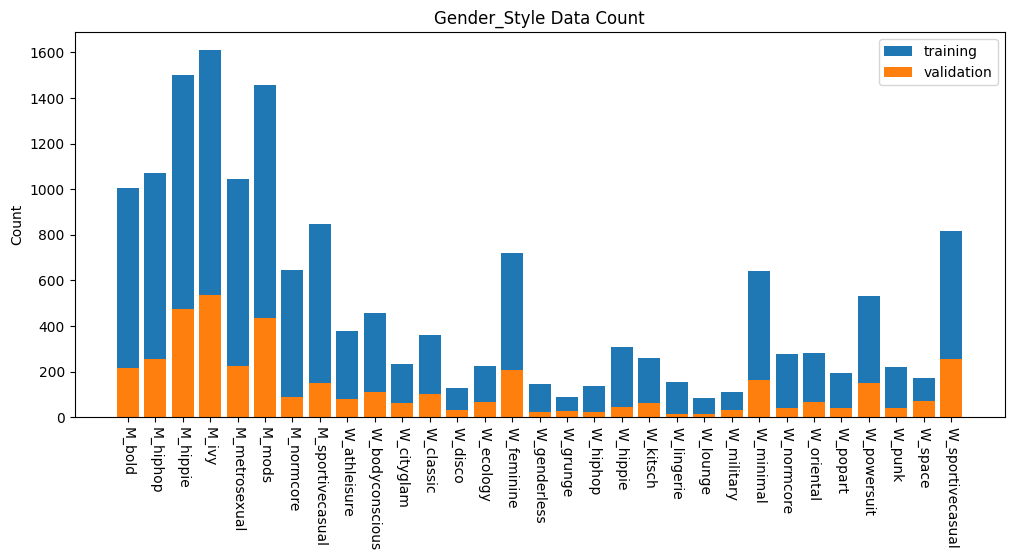

In [45]:
import matplotlib.pyplot as plt

# Group화 된 데이터를 다시 데이터프레임으로 변환
training_stats_data_re = training_stats_data.reset_index()
validation_stats_data_re = validation_stats_data.reset_index()

# 겹치는 스타일이 있음으로 Gender와 Style결합
training_stats_data_re['name'] = training_stats_data_re['gender'] + '_' + training_stats_data_re['style']
validation_stats_data_re['name'] = validation_stats_data_re['gender'] + '_' + validation_stats_data_re['style']

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Gender_Style Data Count')
plt.ylabel('Count')
plt.xticks(rotation=270)
plt.bar(training_stats_data_re['name'], training_stats_data_re['train_count'], label="training")
plt.bar(validation_stats_data_re['name'], validation_stats_data_re['validation_count'], label="validation")

plt.legend()
plt.savefig('Mission2/gender_style_data_count.png', bbox_inches='tight')    # 이미지 저장
plt.show()

## Mission 2-2

### 1. 유효한 label 파일로부터 "응답자 ID"와 "스타일 선호 여부" 정보 추출

In [46]:
import os
import json
import pandas as pd

# filtering 된 JSON 파일들이 있는 폴더 경로 설정
train_path = '/content/filtered_label/training_label'
validation_path = '/content/filtered_label/validation_label'

def preference(label_me, output_file):
    # JSON 파일들이 있는 폴더 경로 설정
    folder_path = label_me

    # 데이터프레임을 만들기 위한 리스트 초기화
    records = []

    # 폴더 내 모든 JSON 파일 처리
    for file_name in tqdm(os.listdir(folder_path)):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            # JSON 파일 로드
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)

                    # 응답자 정보 (user 딕셔너리)
                    r_id = data['user']['R_id']

                    # item 딕셔너리에서 imgName과 Q5 값 추출
                    img_name = data['item']['imgName']
                    q5_value = data['item']['survey']['Q5']

                    # Q5 값에 따라 선호와 비선호 분류
                    if q5_value == 2:
                        preference = '스타일 선호'
                    elif q5_value == 1:
                        preference = '스타일 비선호'
                    records.append({'응답자 ID': r_id, '파일명': img_name, '스타일 선호 여부': preference})

                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_name}: {e}")
                except KeyError as e:
                    print(f"Missing key {e} in file {file_name}")

    # 데이터프레임 생성
    df = pd.DataFrame(records)

    # 응답자 ID 순서대로 정렬
    df.sort_values(by='응답자 ID', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # 중복 데이터 확인
    duplicate_rows = df[df.duplicated()]
    # 중복이 존재하면 제거
    if not duplicate_rows.empty:
        df.drop_duplicates(inplace=True)
        print(f"중복 데이터 {len(duplicate_rows)}개가 제거되었습니다.")

    # 원하는 파일로 저장 (CSV 파일)
    df.to_csv(output_file, encoding='utf-8-sig', index=False)

    print(f"데이터가 {output_file}에 저장되었습니다.")

    return df  # 최종 데이터프레임 반환

# 함수 사용
df_train = preference(train_path, 'Mission2/train_preference.csv')
df_val = preference(validation_path, 'Mission2/val_preference.csv')

  0%|          | 0/16095 [00:00<?, ?it/s]

중복 데이터 12개가 제거되었습니다.
데이터가 Mission2/train_preference.csv에 저장되었습니다.


  0%|          | 0/4104 [00:00<?, ?it/s]

중복 데이터 5개가 제거되었습니다.
데이터가 Mission2/val_preference.csv에 저장되었습니다.


### 2. train/valid 둘 다 응답한 R_id를 기준으로 상위 100명의 데이터 선택
**

In [47]:
# 데이터 프레임의 형태 확인하기
df_train

,응답자 ID,파일명,스타일 선호 여부
0,12,W_03412_50_classic_W.jpg,스타일 선호
1,25,W_12740_00_metrosexual_M.jpg,스타일 비선호
2,26,W_18990_50_feminine_W.jpg,스타일 비선호
3,27,W_17260_19_normcore_M.jpg,스타일 선호
4,27,W_03007_70_hippie_M.jpg,스타일 선호
...,...,...,...
16090,68396,W_24537_70_hippie_M.jpg,스타일 비선호
16091,68398,W_25360_80_bold_M.jpg,스타일 비선호
16092,68729,T_00456_10_sportivecasual_M.jpg,스타일 선호
16093,68743,T_01883_10_sportivecasual_M.jpg,스타일 비선호


In [48]:
# 응답자 ID 별로 설문 응답의 개수 세기
train_count = df_train.groupby(['응답자 ID']).size()
val_count = df_val.groupby(['응답자 ID']).size()

# 열 이름이 동일하므로 헷갈리지 않게 변경
train_count.name = 'train 설문 응답 수'
val_count.name = 'val 설문 응답 수'

# 두 데이터프레임 합친 후 몇 가지 처리
df_sum = pd.concat([train_count, val_count],axis=1)
df_sum = df_sum.fillna(0).astype(int)    # 결측치 0으로 채우기
df_sum['합계'] = df_sum['train 설문 응답 수'] + df_sum['val 설문 응답 수']    # '합계' 열 추가
df_sum = df_sum.sort_values(by='합계', ascending=False)    # '합계' 열 기준으로 내림차순 정렬

# user별 설문 응답수 df 확인
df_sum

,train 설문 응답 수,val 설문 응답 수,합계
응답자 ID,,,
64747,45,15,60
63405,44,14,58
64561,46,12,58
64346,46,12,58
65139,46,12,58
...,...,...,...
65051,0,1,1
65115,0,1,1
65125,0,1,1


In [49]:
# df_sum의 합계를 기준으로 상위 100개 응답자 ID 추출하여 리스트로 저장
top_100_ids = df_sum.head(100).index.tolist()

# 각 데이터에서 유효한 데이터만 거르기
top100_train_df = df_train[df_train['응답자 ID'].isin(top_100_ids)].reset_index(drop=True)
top100_val_df = df_val[df_val['응답자 ID'].isin(top_100_ids)].reset_index(drop=True)

# 데이터 저장
top100_train_df.to_csv('Mission2/top100_train_preference.csv', index=False)
top100_val_df.to_csv('Mission2/top100_val_preference.csv', index=False)

# 각 데이터의 응답자 수가 100명인지 재확인
top100_train_df['응답자 ID'].nunique(), top100_val_df['응답자 ID'].nunique()

(100, 100)

In [50]:
# 상위 100명의 선호도 정보 확인
top100_train_df

,응답자 ID,파일명,스타일 선호 여부
0,368,W_16264_80_bold_M.jpg,스타일 비선호
1,368,W_15340_50_ivy_M.jpg,스타일 비선호
2,368,W_02714_00_metrosexual_M.jpg,스타일 비선호
3,368,W_04604_00_metrosexual_M.jpg,스타일 선호
4,368,W_16403_10_sportivecasual_M.jpg,스타일 선호
...,...,...,...
4445,67975,W_71920_60_mods_M.jpg,스타일 비선호
4446,67975,T_17798_19_normcore_M.jpg,스타일 선호
4447,67975,T_17797_19_normcore_M.jpg,스타일 선호
4448,67975,W_17754_80_bold_M.jpg,스타일 비선호


In [51]:
top100_val_df

,응답자 ID,파일명,스타일 선호 여부
0,368,W_06864_10_sportivecasual_M.jpg,스타일 선호
1,368,W_04678_50_ivy_M.jpg,스타일 선호
2,368,W_16034_80_bold_M.jpg,스타일 비선호
3,368,W_00551_19_normcore_M.jpg,스타일 선호
4,368,W_01703_00_metrosexual_M.jpg,스타일 선호
...,...,...,...
1095,67975,W_17738_80_bold_M.jpg,스타일 선호
1096,67975,T_21986_70_hippie_M.jpg,스타일 비선호
1097,67975,T_21988_70_hippie_M.jpg,스타일 선호
1098,67975,W_52578_50_ivy_M.jpg,스타일 선호


### 3. 상위 100명의 응답자에 대한 "스타일 선호 정보표" 작성

> pivot table을 합치기 위한 준비 단계

In [52]:
# dataset에 대한 state 정보를 추가
top100_train_df['dataset'] = 'Training'
top100_val_df['dataset'] = 'Validation'

# 두 데이터프레임 합치기
combined_df = pd.concat([top100_train_df, top100_val_df], ignore_index=True)

# '응답자 ID'와 'dataset'을 기준으로 그룹화하고, 파일명을 개행문자("\n")와 함께 합치기
grouped = combined_df.groupby(['응답자 ID', 'dataset', '스타일 선호 여부']).agg({
    '파일명': lambda x: '\n'.join(x)
}).reset_index()

# '스타일 선호 여부의 순서를 바꾸어서 'like'가 먼저 나오도록 정렬
grouped.sort_values(by=['응답자 ID', 'dataset', '스타일 선호 여부'], ascending=[True, True, False], inplace=True)

> pivot table을 이용하여 데이터를 합치고, HTML로 보기 좋게 출력

In [53]:
# 피벗 테이블 생성
final_result = grouped.pivot(index='응답자 ID', columns=['dataset', '스타일 선호 여부'], values='파일명')

# HTML로 보기 좋게 출력
from IPython.display import HTML

def display_df(df, rows=5):
    styles = [
        dict(selector="th", props=[("text-align", "left")]),
        dict(selector="td", props=[("white-space", "pre-wrap")])
    ]
    return HTML(df.head(rows).style.set_table_styles(styles).to_html())

# 100명의 응답자에 대한 결과를 모두 출력하기에 결과가 길어짐
display(display_df(final_result, rows=100))

In [54]:
final_result.to_csv('Mission2/final_result.csv')
final_result

dataset                                             Training  \
스타일 선호 여부                                             스타일 선호   
응답자 ID                                                         
368        W_04604_00_metrosexual_M.jpg\nW_16403_10_sport...   
837        W_00829_10_sportivecasual_M.jpg\nW_09157_60_mo...   
7658       W_08410_00_cityglam_W.jpg\nW_18560_70_military...   
7905       W_02845_60_mods_M.jpg\nW_24765_60_mods_M.jpg\n...   
9096       W_06437_90_grunge_W.jpg\nW_19075_50_classic_W....   
...                                                      ...   
66469      W_59268_70_hippie_M.jpg\nT_02558_19_normcore_M...   
66513      T_07416_19_lounge_W.jpg\nW_14828_50_classic_W....   
66592      T_09717_19_genderless_W.jpg\nW_02343_60_space_...   
66731      W_04137_60_minimal_W.jpg\nT_14085_19_genderles...   
67975      W_52583_50_ivy_M.jpg\nW_07095_00_metrosexual_M...   

dataset                                                       \
스타일 선호 여부                                            스타일 비선호   
응답자 ID                                                         
368        W_16264_80_bold_M.jpg\nW_15340_50_ivy_M.jpg\nW...   
837        W_27782_90_hiphop_M.jpg\nW_24381_70_hippie_M.j...   
7658       W_10510_60_space_W.jpg\nW_00682_70_punk_W.jpg\...   
7905       W_10076_50_ivy_M.jpg\nW_15545_70_hippie_M.jpg\...   
9096       W_08232_19_normcore_W.jpg\nW_14393_70_hippie_W...   
...                                                      ...   
66469      T_06076_60_mods_M.jpg\nT_07605_00_metrosexual_...   
66513      W_67337_90_grunge_W.jpg\nW_10984_50_feminine_W...   
66592      W_52969_00_ecology_W.jpg\nW_05140_50_feminine_...   
66731      W_67040_00_oriental_W.jpg\nW_47122_80_powersui...   
67975      T_21986_70_hippie_M.jpg\nW_71922_60_mods_M.jpg...   

dataset                                           Validation  \
스타일 선호 여부                                             스타일 선호   
응답자 ID                                                         
368        W_06864_10_sportivecasual_M.jpg\nW_04678_50_iv...   
837        W_06590_90_hiphop_M.jpg\nW_00829_10_sportiveca...   
7658       W_04927_50_feminine_W.jpg\nW_09731_19_genderle...   
7905            W_02845_60_mods_M.jpg\nW_32034_80_bold_M.jpg   
9096       W_18714_90_kitsch_W.jpg\nW_19205_00_oriental_W...   
...                                                      ...   
66469      W_52231_50_ivy_M.jpg\nT_01123_90_hiphop_M.jpg\...   
66513                               W_14828_50_classic_W.jpg   
66592      T_00253_60_popart_W.jpg\nW_46907_80_powersuit_...   
66731                                                    NaN   
67975      W_07074_00_metrosexual_M.jpg\nW_17738_80_bold_...   

dataset                                                       
스타일 선호 여부                                            스타일 비선호  
응답자 ID                                                        
368        W_16034_80_bold_M.jpg\nW_15340_50_ivy_M.jpg\nW...  
837        W_27700_70_hippie_M.jpg\nW_15661_70_hippie_M.j...  
7658       W_05312_80_bodyconscious_W.jpg\nW_13688_90_hip...  
7905       W_28909_19_normcore_M.jpg\nW_24535_70_hippie_M...  
9096       W_00191_10_sportivecasual_W.jpg\nW_14225_50_fe...  
...                                                      ...  
66469      W_24647_70_hippie_M.jpg\nW_58887_00_metrosexua...  
66513      W_60553_00_cityglam_W.jpg\nW_39793_80_powersui...  
66592      W_35400_80_powersuit_W.jpg\nW_22056_70_hippie_...  
66731      W_64332_80_powersuit_W.jpg\nW_22783_70_hippie_...  
67975      T_21992_70_hippie_M.jpg\nW_52521_50_ivy_M.jpg\...  

[100 rows x 4 columns]